Inter RealSense Depth Camera 
Detecting distance 


## Pi recorded data

In [197]:
# Initialize lists to store data
pi_frameNo = []
pi_timestamp = []
pi_depth = []
pi_motor = []

# Read the text file
with open('Results/1D_only_lung_high_motion.txt', 'r') as file:
    for line in file:
        # Split each line into columns based on spaces
        values = line.split()
        
        # Check the number of values in the line
        if len(values) == 2:
            # Handle lines with only frame_number and depth
            pi_frameNo.append(float(values[0]))
            pi_timestamp.append(0)  # Fill missing timestamp with 0
            pi_depth.append(float(values[1]))
            pi_motor.append(0)  # Fill missing motor with 0
        elif len(values) == 4:
            # Handle lines with frame_number, timestamp, depth, and motor
            pi_frameNo.append(float(values[0]))
            pi_timestamp.append(float(values[1]))
            pi_depth.append(float(values[2]))
            pi_motor.append(float(values[3]))
        else:
            # Handle any other unexpected line format
            print(f"Unexpected line format: {line}")



FileNotFoundError: [Errno 2] No such file or directory: 'Results/1D_only_lung_high_motion.txt'

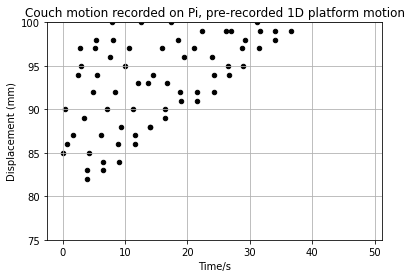

In [151]:
def find_first_non_zero_timestamp(timestamps):
    for index, value in enumerate(timestamps):
        if value != 0:
            return index, value
    return None, None  # If no non-zero value is found

index_motionSTART, value = find_first_non_zero_timestamp(pi_timestamp)

import matplotlib.pyplot as plt
import numpy as np

pi_timestamp_offset = []
for time in pi_timestamp:
    if time == 0:
        pi_timestamp_offset.append(0)
    else:
        pi_timestamp_offset.append((time-value)/1000000)

plt.scatter(pi_timestamp_offset,pi_motor, s=20, color='black', label='Count vs Distance 2')
plt.xlabel('Time/s')
plt.ylabel('Displacement (mm)')
plt.title('Couch motion recorded on Pi, pre-recorded 1D platform motion')
#plt.legend()
plt.ylim(75, 100)
plt.grid(True)
plt.show()

In [944]:
# Input trace 
import numpy as np

# Initialize lists to store data
column1 = []
column2 = []


# Read the text file
with open('Results/time_position_data_adjusted_cycles_v2.txt', 'r') as file:
    for line in file:
        #print(line)
        #column1.append(float(line))
        # Split each line into two columns based on spaces
        values = line.split( )
        
        # Check if there are at least two values
        if len(values) >= 2:
            # Convert values to float and append to respective lists
            column1.append(float(values[0]))
            column2.append(float(values[1]))

# Convert lists to NumPy arrays
data_array_column1 = np.array(column1)
data_array_column2 = np.array(column2)

# Convert values of data_array_column2 to their opposite sign
data_array_column2 = -data_array_column2


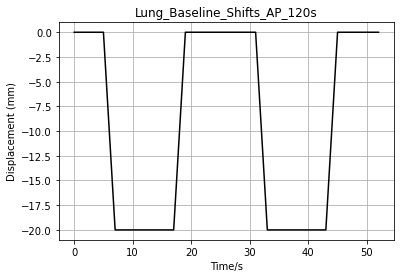

In [945]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(data_array_column1,data_array_column2, color='black', label='Count vs Distance 2')
plt.xlabel('Time/s')
plt.ylabel('Displacement (mm)')
plt.title('Lung_Baseline_Shifts_AP_120s')
#plt.legend()
plt.grid(True)
plt.show()

In [369]:
len(data_array_column2)

640

### 1D Platform Only file

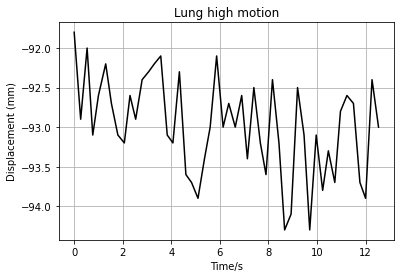

In [757]:
# 1D platform only measurement 
import pandas as pd

# Read the CSV file
df = pd.read_csv('Results/multiROIs_testing.csv')

# Initialize lists to store the data
counts = []
timestamps_1D = []
distances1_1D = []
distances2 = []

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Extract data from each row
    #count = row['Count']
    timestamp = row['Time']  # Assuming 'Time' is the correct column name for timestamp
    distance1_1D = row['Distance 1']
    #distance2 = row[' Distance 2']
    '''
    # Check if 'Distance 2' exists in the DataFrame
    if 'Distance 2' in df.columns:
        distance2 = row[' Distance 2']
    else:
        distance2 = None  # Set distance2 to None if the column doesn't exist
    '''
    # Append data to respective lists
    #counts.append(count)
    timestamps_1D.append(timestamp)
    distances1_1D.append(distance1_1D)
    #distances2.append(distance2)

# Convert each value back to actual time in seconds
actual_time_array = [value * 0.1 for value in counts]

import matplotlib.pyplot as plt
import numpy as np
distances1_1D_offset = []
for item in distances1_1D:
    distances1_1D_offset.append((item-838))

timestamps_offset_1D = []
for item in timestamps_1D:
    timestamps_offset_1D.append((item -timestamps_1D[0])/1000)
plt.plot(timestamps_offset_1D,distances1_1D_offset, color='black', label='Count vs Distance 2')
plt.xlabel('Time/s')
plt.ylabel('Displacement (mm)')
plt.title('Lung high motion')
#plt.legend()
plt.grid(True)
plt.show()

In [ ]:
len(distances1_1D)

In [995]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Results/multiROIs_step_3Hz.csv')

# Initialize lists to store the data
counts = []
timestamps = []
distances1 = []
distances2 = []

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Extract data from each row
    count = row['Count']
    timestamp = row['Time']  # Assuming 'Time' is the correct column name for timestamp
    distance1 = row['Distance 1']
    distance2 = row[' Distance 2']
    '''
    # Check if 'Distance 2' exists in the DataFrame
    if 'Distance 2' in df.columns:
        distance2 = row[' Distance 2']
    else:
        distance2 = None  # Set distance2 to None if the column doesn't exist
    '''
    # Append data to respective lists
    counts.append(count)
    timestamps.append(timestamp)
    distances1.append(distance1)
    distances2.append(distance2)

# Convert each value back to actual time in seconds
actual_time_array = [value * 0.1 for value in counts]


In [640]:
index_motionSTART

NameError: name 'index_motionSTART' is not defined

In [996]:
#indexBreak = index_motionSTART
indexBreak = 40
counts = counts[indexBreak:]
timestamps = timestamps[indexBreak:]
distances1 = distances1[indexBreak:]
distances2 = distances2[indexBreak:]
#distances1_1D = distances1_1D[indexBreak:]
#pi_motor = pi_motor[indexBreak:]
#pi_timestamp_offset = pi_timestamp_offset[indexBreak:]

In [979]:
distances1_1D_offset = distances1_1D_offset[10:]
timestamps_1D = timestamps_1D[10:]

timestamps_offset_1D = []
for item in timestamps_1D:
    timestamps_offset_1D.append((item -timestamps_1D[0])/1000000)



In [801]:
timestamps

[1722992728190.6775,
 1722992728406.2004,
 1722992728591.081,
 1722992728791.0251,
 1722992729025.1353,
 1722992729225.997,
 1722992729424.0845,
 1722992729623.8867,
 1722992729857.2693,
 1722992730057.671,
 1722992730257.7083,
 1722992730457.03,
 1722992730690.2869,
 1722992730890.3752,
 1722992731090.2039,
 1722992731290.222,
 1722992731490.256,
 1722992731690.119,
 1722992731890.148,
 1722992732123.4185,
 1722992732323.328,
 1722992732523.8723,
 1722992732722.988,
 1722992732923.3213,
 1722992733126.006,
 1722992733323.0225,
 1722992733556.1956,
 1722992733755.9568,
 1722992733955.9915,
 1722992734189.5571,
 1722992734389.78,
 1722992734591.6943,
 1722992734789.7146,
 1722992735024.6204,
 1722992735222.3545,
 1722992735423.1487,
 1722992735622.4143,
 1722992735822.1477,
 1722992736022.0652,
 1722992736268.2036,
 1722992736455.3452,
 1722992736655.5208,
 1722992736855.5532,
 1722992737055.0847,
 1722992737256.2268,
 1722992737489.3303,
 1722992737688.463,
 1722992737888.3992,
 172299

In [896]:
distances2

[697.3,
 697.5,
 697.5,
 697.0,
 697.6,
 697.3,
 696.8,
 696.6,
 696.5,
 697.0,
 697.5,
 697.3,
 697.4,
 697.7,
 697.2,
 696.9,
 697.1,
 697.3,
 697.2,
 696.8,
 696.7,
 697.1,
 697.1,
 696.8,
 696.9,
 697.4,
 697.5,
 696.7,
 697.3,
 697.5,
 697.5,
 697.4,
 696.8,
 696.9,
 697.5,
 697.2,
 697.3,
 697.2,
 697.3,
 696.8,
 696.7,
 697.2,
 697.3,
 696.9,
 696.7,
 697.1,
 696.7,
 696.5,
 696.7,
 697.5,
 696.8,
 696.8,
 696.5,
 696.7,
 696.6,
 697.0,
 696.2,
 696.6,
 696.3,
 696.3,
 696.5,
 696.6,
 696.2,
 696.5,
 696.6,
 696.0,
 696.5,
 696.5,
 696.7,
 696.4,
 697.3,
 697.8,
 697.7,
 697.2,
 697.2,
 697.5,
 697.7,
 697.4,
 696.9,
 696.8,
 697.3,
 698.0,
 697.7,
 697.3,
 697.4,
 697.2,
 696.8,
 697.3,
 697.2,
 696.6,
 696.9,
 696.6,
 697.3,
 697.4,
 697.5,
 697.6,
 696.9,
 697.3,
 697.3,
 697.6,
 696.5,
 696.7,
 696.8,
 697.1,
 696.7,
 697.1,
 697.3,
 696.7,
 696.7,
 697.1,
 697.0,
 697.2,
 696.5,
 696.5,
 696.9,
 697.0,
 697.1,
 696.9,
 697.2,
 697.0,
 697.0,
 697.7,
 696.3,
 696.5,
 697.3,


In [997]:

distances1_offset = []
for item in distances1:
    distances1_offset.append((item -747))
    
distances2_offset = []
for item in distances2:
    distances2_offset.append((item - 697))


'''
pi_motor_offset = []
for item in pi_motor:
    pi_motor_offset.append((item-80))
'''    
timestamps_offset = []
for item in timestamps:
    timestamps_offset.append((item -timestamps[0])/1000)


In [615]:
timestamps_offset

[0.0,
 0.29972119140625,
 0.599779541015625,
 0.89952294921875,
 1.199587158203125,
 1.49934912109375,
 1.7996201171875,
 2.09924853515625,
 2.399178955078125,
 2.699499267578125,
 2.999350341796875,
 3.29875244140625,
 3.565596923828125,
 3.865360107421875,
 4.198639892578125,
 4.49868115234375,
 4.765203125,
 5.06541357421875,
 5.3982763671875,
 5.698194091796875,
 5.99865771484375,
 6.29799072265625,
 6.597971923828125,
 6.898140869140625,
 7.1978349609375,
 7.497932861328125,
 7.797616455078125,
 8.097971923828124,
 8.39783837890625,
 8.69733154296875,
 9.030970947265626,
 9.330593994140624,
 9.630397216796876,
 9.93022412109375,
 10.197228271484375,
 10.53041796875,
 10.830192138671874,
 11.097161865234375,
 11.43014892578125,
 11.696560791015624,
 11.99699072265625,
 12.32998193359375,
 12.6296923828125,
 12.96291455078125,
 13.263249755859375,
 13.5626884765625,
 13.862657958984375,
 14.129473876953124,
 14.462496337890625,
 14.76222998046875,
 15.028965576171874,
 15.3290827636

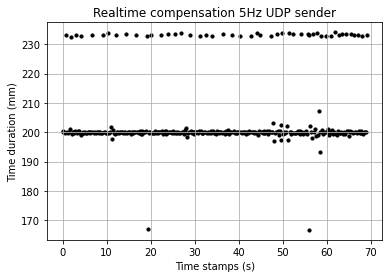

In [946]:
time_interval = []
for index in range(len(timestamps)-1):
    time_interval.append(timestamps[index+1]-timestamps[index])

plt.scatter(timestamps_offset[:-1],time_interval, color='black',s=10, label='time interval')
plt.xlabel('Time stamps (s)')
plt.ylabel('Time duration (mm)')
plt.title('Realtime compensation 5Hz UDP sender')
#plt.legend()
plt.grid(True)
plt.show()

In [600]:
np.mean(time_interval)

257.43415786784743

In [289]:
len(timestamps_offset)

638

In [290]:
len(data_array_column2)

640

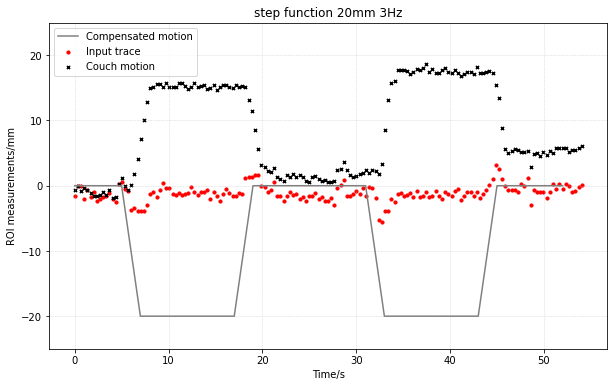

In [1000]:
import matplotlib.pyplot as plt
import numpy as np
data_array_counts = []
data_array_distances1 = []
data_array_distances2 =[]

for i in range(len(timestamps_offset)):
    if timestamps_offset[i] <= 120:
        data_array_counts.append(timestamps_offset[i])
        data_array_distances1.append(distances1_offset[i])
        data_array_distances2.append(distances2_offset[i])
'''
#data_array_Pi_time = np.array(pi_timestamp_offset)
#data_array_Pi_motor = np.array(pi_motor_offset)
data_array_counts = np.array(timestamps_offset)
data_array_distances1 = np.array(distances1_offset)
data_array_distances2 = np.array(distances2_offset)
'''

datat_array_timestamps_offset_1D = np.array(timestamps_offset_1D) 
data_array_distances1_1D = np.array(distances1_1D_offset)

# Plot the data
plt.figure(figsize=(10, 6))
# Assuming 'data_array_counts', 'data_array_distances1', and 'data_array_distances2' are already defined
plt.scatter(data_array_counts, data_array_distances1, color='red', label='Couch motion', s = 10)   # Change color to red
plt.scatter(data_array_counts,data_array_distances2, color='black', label='Count vs Distance 2', s = 10, marker = 'x')
plt.plot(data_array_column1,data_array_column2, color='grey', label='Input trace')

#plt.plot(data_array_counts, data_array_distances1, color='blue', label='Compensated motion')  # Change color to blue
#plt.scatter(data_array_Pi_time, data_array_Pi_motor, s=10, color='green', label='Pi motion')
#plt.plot(datat_array_timestamps_offset_1D, data_array_distances1_1D, color='grey', label='Input trace')   # Change color to red

plt.xlabel('Time/s')
plt.ylabel('ROI measurements/mm')
plt.title('step function 20mm 3Hz')
#plt.legend(['Couch motion by depth camera','Uncompensated motion','Compensated motion','Couch motion on Pi end'])
plt.legend([ 'Compensated motion', 'Input trace', 'Couch motion'])
plt.ylim(-25, 25)
# Set x-axis tick locations every 5 seconds
#plt.xticks(np.arange(min(data_array_counts), max(data_array_counts)+1, 5))

# Adjust grid size and transparency
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # Show grid lines on both major and minor ticks with reduced transparency

plt.show()

In [755]:
# Original motion 
# distances1_1D
import numpy as np
mean_1D = np.mean(data_array_column2)
print('Mean:' , mean_1D)
std_1D = np.std(data_array_column2)
print('SD: ',std_1D)
# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(data_array_column2, 5)
percentile_95 = np.percentile(data_array_column2, 95)
print('5% ',percentile_5)
print('95% ',percentile_95)
min_1D = np.min(data_array_column2)
print('Minimum: ', min_1D)
max_1D = np.max(data_array_column2)
print('Maximum: ', max_1D)


Mean: -0.24986702828618973
SD:  2.795967526335143
5%  -4.821418
95%  4.473394
Minimum:  -6.757217
Maximum:  5.413052


In [868]:
# Compensated motion
# distances1_1D
import numpy as np
mean_1D = np.mean(data_array_distances1 )
print('Mean:' , mean_1D)
std_1D = np.std(data_array_distances1 )
print('SD: ',std_1D)

# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(data_array_distances1, 5)
percentile_95 = np.percentile(data_array_distances1, 95)
print('5% ',percentile_5)
print('95% ',percentile_95)

min_1D = np.min(data_array_distances1 )
print('Minimum: ', min_1D)
max_1D = np.max(data_array_distances1 )
print('Maximum: ', max_1D)

Mean: 0.900680272108798
SD:  11.096653271277072
5%  -18.33000000000004
95%  19.364999999999853
Minimum:  -27.100000000000023
Maximum:  29.100000000000023


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Sample data (replace with your actual data)
# Trace 1 (authentic data that cannot be interpolated)
time1 = np.array(timestamps_offset[0:272])  # time stamps
compensatedMotion = np.array(distances1_offset[0:272])   # x values
couchMotion = np.array(distances2_offset[0:234])     # y values

# Trace 2 (data to be interpolated)
data_array_column1  # time stamps
data_array_column2                # input trace motion


# Interpolate the data of Trace 2 to match the time stamps of Trace 1
interp_motion = interp1d(data_array_column1, data_array_column2, kind='linear', fill_value='extrapolate')


# Evaluate the interpolation at the time points of Trace 1
common_motion = interp_motion(time1)
common_motion_offset = []
for item in common_motion:
    common_motion_offset.append(item)

# Generate an zero line for plotting 
zero_line = np.zeros(len(time1))

# Plot the data
plt.figure(figsize=(10, 6))

# Plot Trace 1 (authentic data)
plt.plot(time1, compensatedMotion, label='Couch')
plt.plot(time1, zero_line, color='red')
plt.plot(time1, couchMotion, label='1D Platform')

# Plot interpolated Trace 2
plt.plot(time1, common_motion_offset, color='green',label='Input trace')


plt.xlabel('Time (s)', fontsize = 14)
plt.ylabel('Displacement (mm)', fontsize = 14)
plt.title('Lung mean motion', fontsize = 20)
plt.legend(fontsize = 14)
plt.ylim(-15, 15)
#plt.grid(True)
plt.show()


In [ ]:
# Result quantification 
import numpy as np
mean_1D = np.mean(compensatedMotion)
print('Mean:' , mean_1D)
std_1D = np.std(compensatedMotion)
print('SD: ',std_1D)
min_1D = np.min(compensatedMotion)
print('Minimum: ', min_1D)
max_1D = np.max(compensatedMotion)
print('Maximum: ', max_1D)
# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(compensatedMotion, 5)
percentile_95 = np.percentile(compensatedMotion, 95)
print('5% ',percentile_5)
print('95% ',percentile_95)

In [ ]:
mean_input = np.mean(common_motion_offset)
print('Mean:' , mean_input)
std_input = np.std(common_motion_offset)
print('SD: ',std_input)
min_input = np.min(common_motion_offset)
print('Minimum: ', min_input)
max_input = np.max(common_motion_offset)
print('Maximum: ', max_input)
# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(common_motion_offset, 5)
percentile_95 = np.percentile(common_motion_offset, 95)
print('5% ',percentile_5)
print('95% ',percentile_95)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 10  # in mm
period = 10     # in seconds
time_interval = 0.2  # in seconds

# Generate time values from 0 to 10 seconds with a step of 0.2 seconds
t = np.arange(0, 100 + time_interval, time_interval)

# Generate the sine wave values
y = amplitude * np.sin((2 * np.pi / period) * t)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, y, marker='o')
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mm)')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 5  # in mm
period = 10     # in seconds
time_interval = 0.2  # in seconds

# Generate time values from 0 to 100 seconds with a step of 0.2 seconds
t = np.arange(0, 100 + time_interval, time_interval)

# Generate the sine wave values
y = amplitude * np.sin((2 * np.pi / period) * t)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, y, marker='o')
plt.title('Sine Wave Repeated for 10 Cycles')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mm)')
plt.grid(True)
plt.show()

# Prepare the data for writing to a file
data = np.column_stack((t, y))

# Define the filename
filename = "sine_wave_data.txt"

# Write the data to a text file
np.savetxt(filename, data, fmt="%10.5f", delimiter="\t")

print(f"Data has been written to {filename}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 10  # in mm
period = 2.5     # in seconds
time_interval = 0.2  # in seconds

# Generate time values from 0 to 100 seconds with a step of 0.2 seconds
t = np.arange(0, 50 + time_interval, time_interval)

# Generate the sine wave values
y = amplitude * np.sin((2 * np.pi / period) * t)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, y, marker='o')
plt.title('Sine Wave Repeated for 10 Cycles')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mm)')
plt.grid(True)
plt.show()

# Prepare the data for writing to a file
data = np.column_stack((t, y))

# Define the filename
filename = "sine_wave_data_2.5s_10mm.txt"

# Write the data to a text file with the desired formatting
np.savetxt(filename, data, fmt="%.1f %.15f", comments='')

print(f"Data has been written to {filename}")


In [ ]:
/Users/annyan/Desktop/realsense_depth/Results/Hexamotion Traces (original)/Lung/4DLungTrajectories

In [393]:
# Define the file path
file_path = 'Results/Hexamotion Traces (original)/Lung/4DLungTrajectories/t_Lung_Baseline_Shifts.txt'

# Read the file and process the data
data = []
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into columns
        columns = line.strip().split()
        # Extract the second column
        if len(columns) >= 2:
            data.append(float(columns[0]))

# Define the sample frequency and calculate the time step
sample_frequency = 50  # Hz
time_step = 1 / sample_frequency  # 0.02 seconds

# Generate timestamps
timestamps = [i * time_step for i in range(len(data))]

# Define the output file path
output_file_path = 'Lung_Baseline_Shifts_LR.txt'

# Write the results to the output file
with open(output_file_path, 'w') as output_file:
    for time, value in zip(timestamps, data):
        output_file.write(f"{time:.5f} {value:.6f}\n")



In [736]:
# Define the file path
file_path = 'Results/Hexamotion Traces (original)/Lung/4DLungTrajectories/t_Lung_Baseline_Shifts.txt'

# Read the file and process the data
data = []
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into columns
        columns = line.strip().split()
        # Extract the second column
        if len(columns) >= 2:
            data.append(float(columns[2]))

# Define the sample frequency and calculate the time step
sample_frequency = 50  # Hz
time_step = 1 / sample_frequency  # 0.02 seconds

# Generate timestamps
timestamps = [i * time_step for i in range(len(data))]

# Filter data to keep every 0.2 seconds (every 10th sample)
filtered_data = data[::10]
filtered_timestamps = timestamps[::10]

# Define the output file path
output_file_path = 'Lung_Baseline_Shifts_LR.txt'

# Write the filtered results to the output file
with open(output_file_path, 'w') as output_file:
    for time, value in zip(filtered_timestamps, filtered_data):
        output_file.write(f"{time:.5f} {value:.6f}\n")

print(f"Filtered data written to {output_file_path}")


Filtered data written to Lung_Baseline_Shifts_LR.txt


In [400]:
import math

# Define the file path
file_path = 'Results/Hexamotion Traces (original)/Lung/4DLungTrajectories/t_Lung_Baseline_Shifts.txt'

# Read the file and process the data
data = []
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into columns
        columns = line.strip().split()
        # Extract the first three columns
        if len(columns) >= 3:
            x = float(columns[0])
            y = float(columns[1])
            z = float(columns[2])
            # Compute the Euclidean norm
            magnitude = math.sqrt(x**2 + y**2 + z**2)
            data.append(magnitude)

# Define the sample frequency and calculate the time step
sample_frequency = 50  # Hz
time_step = 1 / sample_frequency  # 0.02 seconds

# Generate timestamps
timestamps = [i * time_step for i in range(len(data))]

# Define the output file path
output_file_path = 'Lung_Baseline_Shifts_combined.txt'

# Write the results to the output file
with open(output_file_path, 'w') as output_file:
    for time, value in zip(timestamps, data):
        output_file.write(f"{time:.5f} {value:.6f}\n")

print(f"Processed data written to {output_file_path}")


Processed data written to Lung_Baseline_Shifts_combined.txt


In [737]:
# Define the file path
file_path = 'Lung_Baseline_Shifts_LR.txt'  # Use the path of the generated file

# Read the file and keep only the first 120 seconds of data
data = []
with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        if i >= 601:  # Stop after 600 samples (120 seconds)
            break
        data.append(line.strip())

# Define the output file path for the 120-second trace
output_file_120s_path = 'Lung_Baseline_Shifts_LR_120s.txt'

# Write the filtered results to the new output file
with open(output_file_120s_path, 'w') as output_file:
    for line in data:
        output_file.write(line + '\n')

print(f"120-second data written to {output_file_120s_path}")


120-second data written to Lung_Baseline_Shifts_LR_120s.txt
